# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


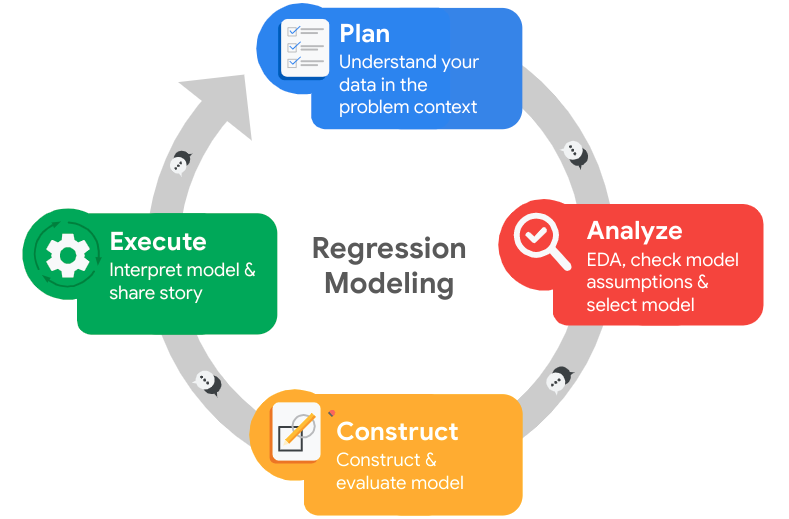

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score


# logistic regression
from sklearn.linear_model import LogisticRegression

# Random forest
from sklearn.ensemble import RandomForestClassifier

# Decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# XGBoost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# For saving model
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###

df0 = (df0
       .rename(columns={"average_montly_hours": "average_monthly_hours",
                       "time_spend_company": "tenure"})
       .rename(str.lower, axis="columns"))
# Display all column names after the update
### YOUR CODE HERE ###
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicated_rows = df0[df0.duplicated()]
duplicated_rows.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
print(f"Shape before dropping duplicate: {df0.shape}")
df1 = df0[~df0.duplicated(keep='first')]


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(f"Shape after dropping duplicate: {df1.shape}")
df1.head()

Shape before dropping duplicate: (14999, 10)
Shape after dropping duplicate: (11991, 10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

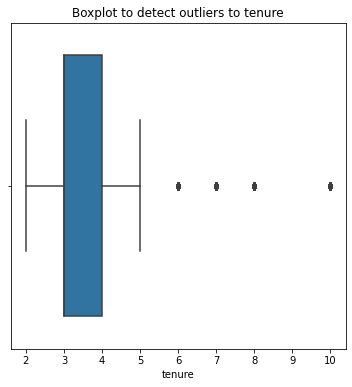

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,6))
plt.title("Boxplot to detect outliers to tenure")
sns.boxplot(data=df1, x="tenure")
plt.show()


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###


df1.loc[df1["tenure"] > 5].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium


In [13]:
def find_boundaries(df: pd.DataFrame, variable: str, distance:int = 1.5)-> tuple:
    """Find the boundary of a variable distribution"""
    
    # Compute the 25th percentile in `variable`
    percentile25 = df[variable].quantile(0.25)
    
    # Compute the 75th percentile in `variable`
    percentile75 = df[variable].quantile(0.75)
    
    # Compute the interquatile values in `variable`
    iqr = percentile75 - percentile25
    # Define the upper and lower boundary
    lower_boundary = percentile25 - distance*iqr
    upper_boundary = percentile75 + distance*iqr
    print(f"Lower limit: {lower_boundary}")
    print(f"Upper limit: {upper_boundary}")
    
    return lower_boundary, upper_boundary
upper_limit, lower_limit = find_boundaries(df1, "tenure")

# Subset the data containing outliers in tenure
outliers_tenure = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers_tenure))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 11991


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
num_of_people_who_left = df1["left"].value_counts()
print(f"The number of employees who left: {num_of_people_who_left[1]}")
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
percent_left = df1["left"].value_counts(normalize=True)
print(f"The percentage of employees who left: {percent_left[1] * 100:.3}%")

The number of employees who left: 1991
The percentage of employees who left: 16.6%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

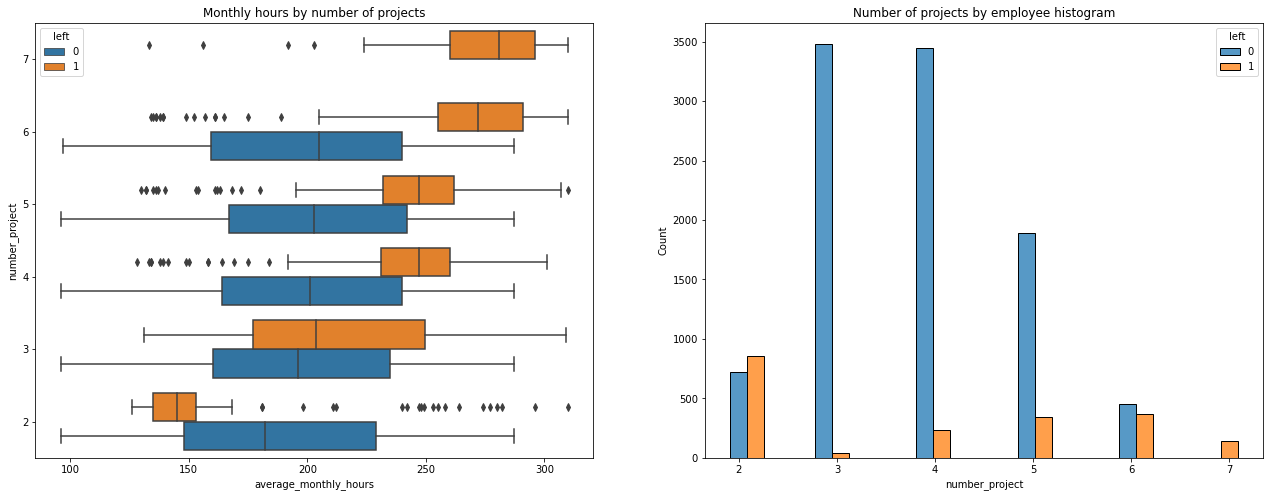

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(22,8))

sns.boxplot(data=df1, x="average_monthly_hours", y="number_project", hue="left", orient="h", ax=ax[0])
ax[0].set_title("Monthly hours by number of projects")
ax[0].invert_yaxis()

tenure_stay = df1.loc[df1["left"] == 0, "number_project"]
tenure_left = df1.loc[df1["left"] == 1, "number_project"]
sns.histplot(data=df1, x="number_project", hue="left", multiple="dodge", shrink=2, ax=ax[1])
ax[1].set_title("Number of projects by employee histogram")

plt.show()

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
avg_monthly_hours_7projects = df1.loc[df1["number_project"] == 7, "average_monthly_hours"].mean()
print(f"Mean monthly hours for employees with 7 project: {avg_monthly_hours_7projects}")
avg_monthly_hours_6projects = df1.loc[df1["number_project"] == 6, "average_monthly_hours"].mean()
print(f"Mean monthly hours for employee with 6 project: {avg_monthly_hours_6projects}")

avg_monthly_hours_for_all = df1["average_monthly_hours"].mean()
print(f"Mean monthly hours for employee with less than 6 projects: {avg_monthly_hours_for_all}")


def calulate_overwork(work_hrs: float, normal_hrs:int=200)->float:
    """Compute overworked hours in percentage."""
    abs_difference = abs(work_hrs - normal_hrs)
    average_hours = (work_hrs + normal_hrs)/2
    percent_diff = abs_difference/average_hours * 100
    return round(percent_diff,2)

print(calulate_overwork(avg_monthly_hours_7projects))
print(calulate_overwork(avg_monthly_hours_6projects))

Mean monthly hours for employees with 7 project: 275.62068965517244
Mean monthly hours for employee with 6 project: 230.39225181598064
Mean monthly hours for employee with less than 6 projects: 200.4735218080227
31.8
14.12


In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
df1.loc[df1["number_project"] == 7, "left"].value_counts()

1    145
Name: left, dtype: int64

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(df1, x="average_monthly_hours", y="satisfaction_level", hue="left", alpha=0.4)
plt.axvline(x=166.67, color="red", label="166.67 hrs./mo.", ls="--")
plt.legend(labels=["left", "stayed", "166.67 hrs./mo."])
plt.title("Monthly hours by Satisfaction level");

ValueError: Could not interpret value `satisfaction_level` for parameter `y`

<Figure size 1152x648 with 0 Axes>

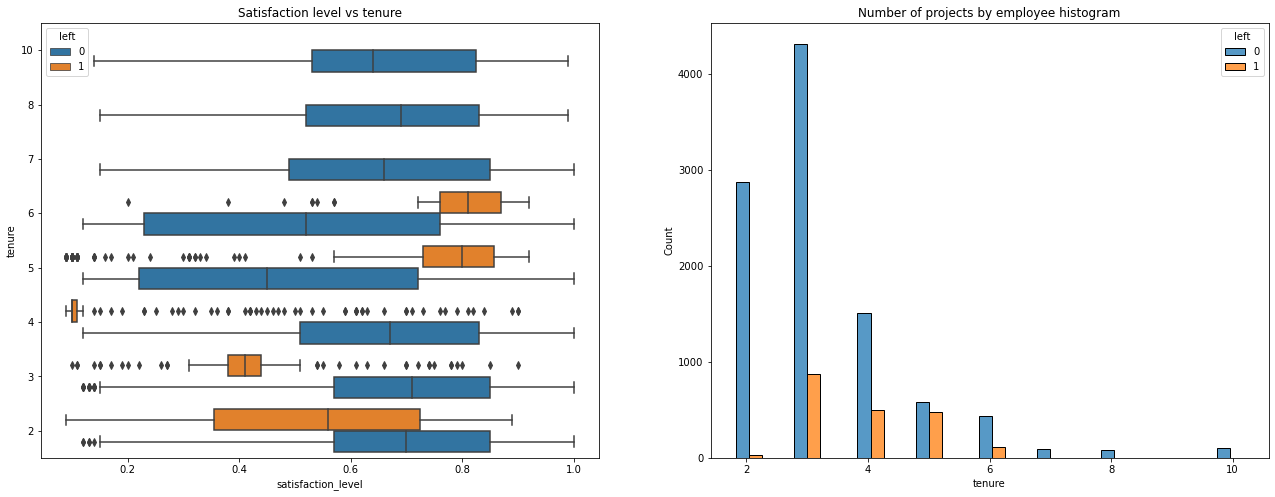

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Create the boxplot showing `average_monthly_hours` distribution for `number_project`
sns.boxplot(data=df1, x="satisfaction_level", y="tenure", hue="left", orient="h", ax=ax[0])
ax[0].set_title("Satisfaction level vs tenure")
ax[0].invert_yaxis()

# Create a histogram showing distribution of `number_project`, comparing those who `left`.
tenure_stay = df1.loc[df1["left"] == 0, "number_project"]
tenure_left = df1.loc[df1["left"] == 1, "number_project"]
sns.histplot(data=df1, x="tenure", hue="left", multiple="dodge", shrink=5, ax=ax[1])
ax[1].set_title("Number of projects by employee histogram")

plt.show()

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
df1.groupby(["left"])["satisfaction_level"].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


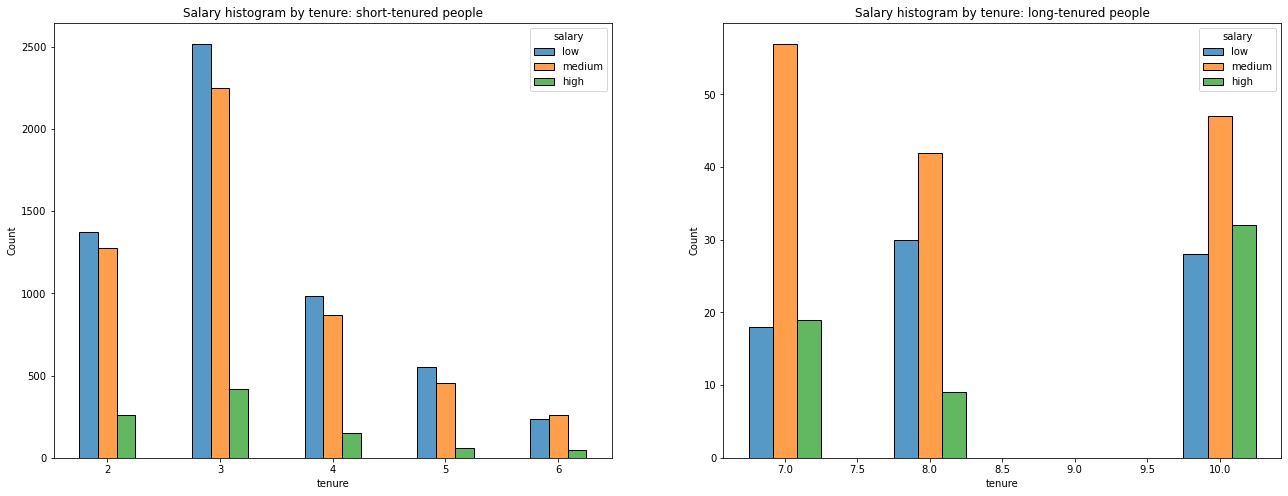

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short tenure
tenure_short = df1[df1["tenure"] < 7]

# Define long tenure
tenure_long = df1[df1["tenure"] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x="tenure", hue="salary", discrete=1, hue_order=["low", "medium", "high"],
            multiple="dodge", shrink=0.5, ax=ax[0])
ax[0].set_title("Salary histogram by tenure: short-tenured people")

sns.histplot(data=tenure_long, x="tenure", hue="salary", discrete=1, hue_order=["low", "medium", "high"],
            multiple="dodge", shrink=0.5, ax=ax[1])
ax[1].set_title("Salary histogram by tenure: long-tenured people");

Text(0.5, 1.0, 'Scatterplot of monthly hours by last evaluation score')

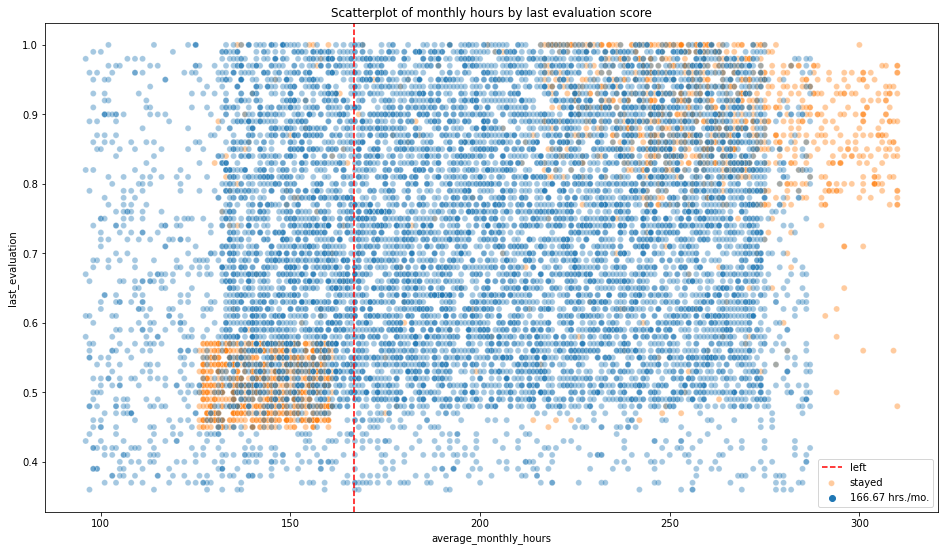

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x="average_monthly_hours", y="last_evaluation", hue="left", alpha=0.4)
plt.axvline(x=166.67, label="166.67 hrs./mo.", color="red", ls="--")
plt.legend(labels=["left", "stayed", "166.67 hrs./mo."])
plt.title("Scatterplot of monthly hours by last evaluation score")

Text(0.5, 1.0, 'Monthly hours vs promotion last 5 years')

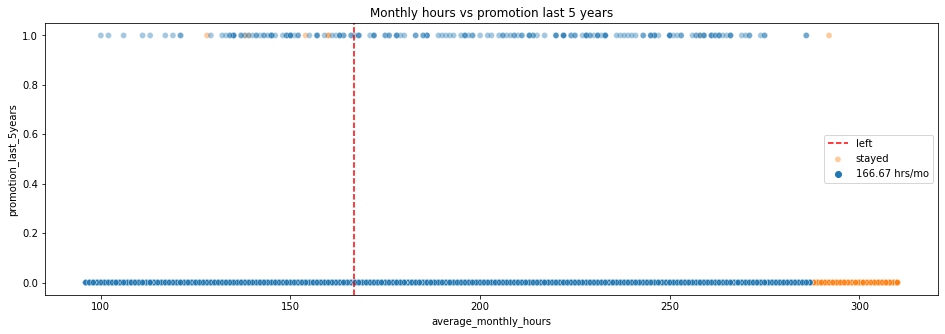

In [23]:
plt.figure(figsize=(16,5))
sns.scatterplot(data=df1, x="average_monthly_hours", y="promotion_last_5years", hue="left", alpha=0.4)
plt.axvline(x=166.67, color="red", ls="--")
plt.legend(labels=["left", "stayed", "166.67 hrs/mo"])
plt.title("Monthly hours vs promotion last 5 years")

In [24]:
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

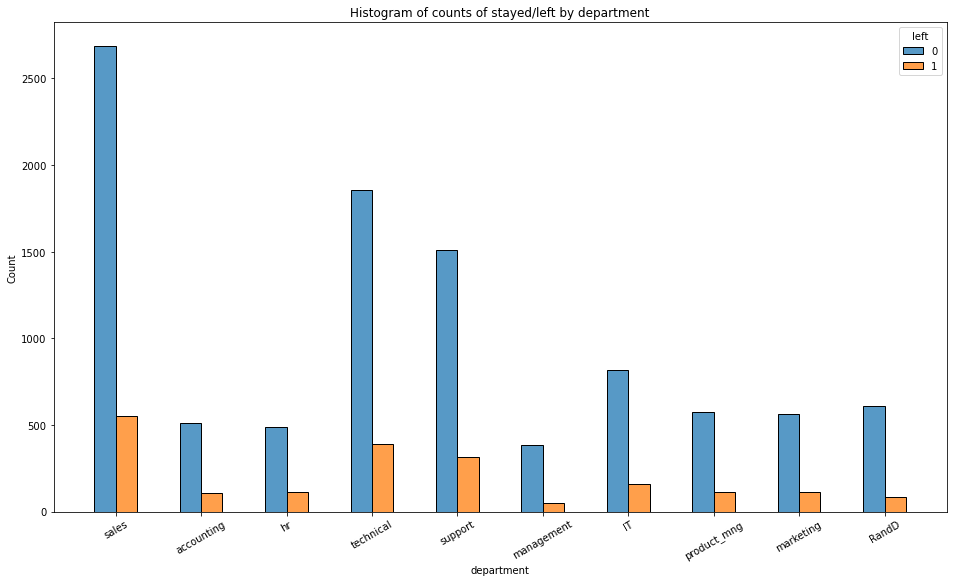

In [25]:
plt.figure(figsize=(16, 9))
sns.histplot(data=df1, x="department", hue="left", discrete=1, 
             hue_order=[0,1], multiple="dodge", shrink=0.5)
plt.xticks(rotation=30)
plt.title("Histogram of counts of stayed/left by department");

In [27]:
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df1.corr(numeric_only=True), vmin=-1, vmax=1, 
                      annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title("Correlation Heatmap");

TypeError: corr() got an unexpected keyword argument 'numeric_only'

<Figure size 1152x648 with 0 Axes>

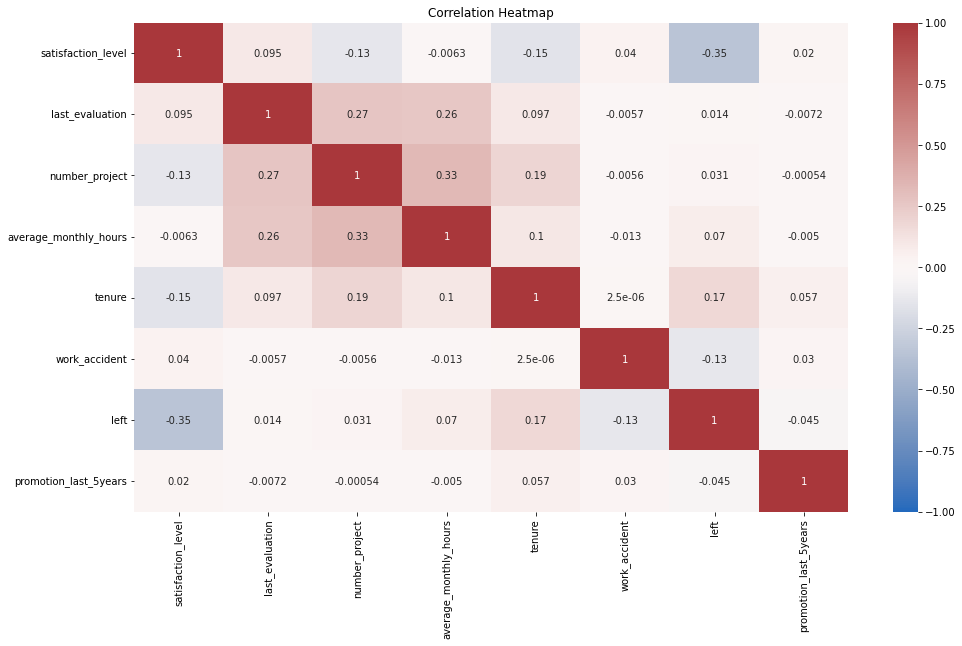

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the numeric columns
numeric_df = df1.select_dtypes(include=['number'])

# Plotting the heatmap
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, 
                      annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title("Correlation Heatmap")
plt.show()


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [29]:
### YOUR CODE HERE ###
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [35]:
df1.to_csv("cleaned_hr_dataset.csv", index=False)

In [36]:
df_encoded = df1.copy()

# Encode the Salary variable as an ordinal numeric category
ordinal_mapping = {"low": 0,"medium": 1, "high": 2}
df_encoded["salary"] = df_encoded["salary"] .map(ordinal_mapping)

# Dummy encode the `department` column
df_encoded = pd.get_dummies(df_encoded, drop_first=False)
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'Heatmap of the selected variables in the dataset')

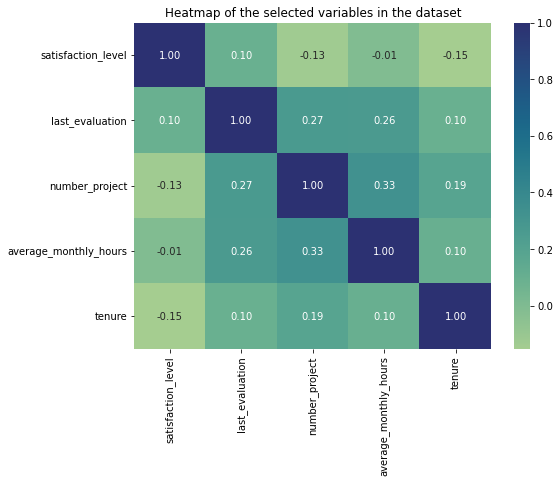

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[["satisfaction_level", "last_evaluation", "number_project", "average_monthly_hours", "tenure"]].corr(), annot=True, fmt=".2f", cmap="crest")
plt.title("Heatmap of the selected variables in the dataset")

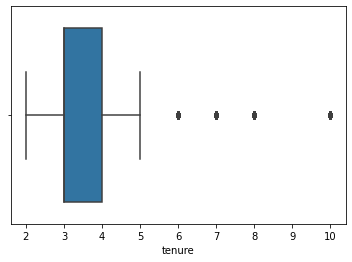

In [38]:
sns.boxplot(df1["tenure"], orient="h");

In [39]:
lower_limit, upper_limit = find_boundaries(df_encoded, "tenure")

# df_logreg = df_encoded[(df_encoded["tenure"] >= lower_limit) & (df_encoded["tenure"] <= upper_limit)]
# df_logreg
outliers = np.where(df_encoded["tenure"] > upper_limit, True,
                   np.where(df_encoded["tenure"] < lower_limit, True, False))

# Create a dataframe of the outliers
outliers_df = df_encoded.loc[outliers, "tenure"]

# Select row without outliers in `tenure` and save the result in a new df
df_reg = df_encoded.loc[~outliers]
df_reg.head()

Lower limit: 1.5
Upper limit: 5.5


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
y = df_reg["left"]

y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [41]:
X = df_reg.drop("left", axis=1)


X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [43]:
model = LogisticRegression(random_state=0, max_iter=500)


log_clf = model.fit(X_train, y_train)

In [44]:
y_pred = log_clf.predict(X_test)

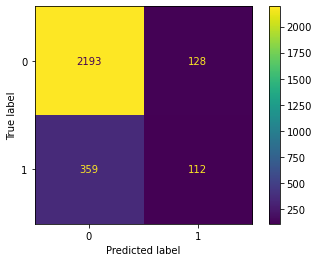

In [45]:
cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create dispay of confusion matrix
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_clf.classes_)

# Plot confusion matix
cm_disp.plot(values_format="")

# Display plot
plt.show();

0    0.831468
1    0.168532
Name: left, dtype: float64


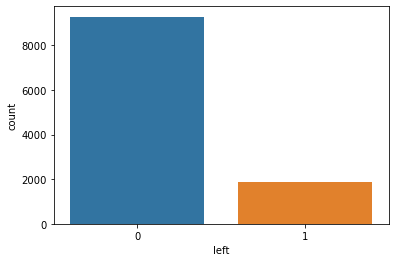

In [46]:
print(y.value_counts(normalize=True))

# Display the class imbalance in the outcome variable
sns.countplot(data=df_reg, x=y);

In [47]:
target_labels = ["Stayed(Would not leave)", "Left (Would leave)"]
print(classification_report(y_test, y_pred, target_names=target_labels))

                         precision    recall  f1-score   support

Stayed(Would not leave)       0.86      0.94      0.90      2321
     Left (Would leave)       0.47      0.24      0.32       471

               accuracy                           0.83      2792
              macro avg       0.66      0.59      0.61      2792
           weighted avg       0.79      0.83      0.80      2792



In [48]:
model1 = LogisticRegression(random_state=0, max_iter=500, class_weight="balanced")
log_clf_1 = model1.fit(X_train, y_train)
y_pred_1 = log_clf_1.predict(X_test)


target_labels = ["Stayed(Would not leave)", "Left (Would leave)"]
print(classification_report(y_test, y_pred_1, target_names=target_labels))

                         precision    recall  f1-score   support

Stayed(Would not leave)       0.98      0.82      0.89      2321
     Left (Would leave)       0.51      0.91      0.65       471

               accuracy                           0.84      2792
              macro avg       0.74      0.87      0.77      2792
           weighted avg       0.90      0.84      0.85      2792



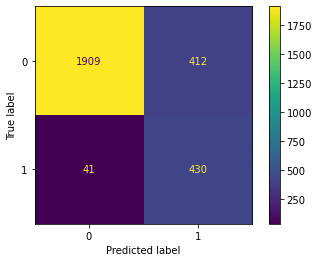

In [49]:
cm_1 = confusion_matrix(y_test, y_pred_1, labels=log_clf_1.classes_)

# Create dispay of confusion matrix
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=log_clf_1.classes_)

# Plot confusion matix
cm_disp.plot(values_format="")

# Display plot
plt.show();

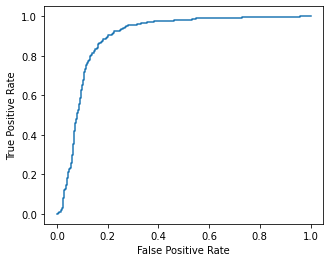

In [50]:
y_pred_proba = log_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)


#create ROC curve
plt.figure(figsize=(5,4))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

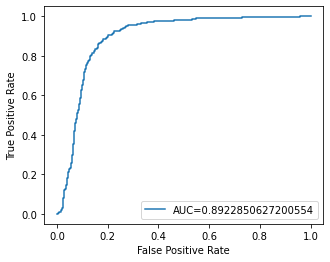

In [51]:
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.figure(figsize=(5,4))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [52]:
pd.DataFrame(data={"Features Name": log_clf.feature_names_in_, "Model Coefficients": log_clf.coef_[0]})

AttributeError: 'LogisticRegression' object has no attribute 'feature_names_in_'

In [53]:
y = df_encoded["left"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [54]:
X = df_encoded.drop("left", axis=1)

# Display the first few rows
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
decision_tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over

cv_params = {"max_depth": [4, 6, 8, None ],
            "min_samples_leaf": [1, 3, 5],
            "min_samples_split": [2, 4, 6]}

# Assign a dictionary of scoring metrics to capture 
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

# Instantiate Gridsearch
tree1 = GridSearchCV(decision_tree,
                     cv_params,
                     scoring=scoring,
                     cv=4,
                     refit="roc_auc")

In [57]:
%%time
# fit the decision
tree1.fit(X_train, y_train)

CPU times: user 2.91 s, sys: 0 ns, total: 2.91 s
Wall time: 2.91 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 3, 5],
                

In [58]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [59]:
tree1.best_score_

0.9688735287591919

In [60]:
def make_results(model_name:str, model_object: tree1, metric:str) -> pd.DataFrame:
    """
    Extract all scores from the grid search
    
    Parameters
    ----------
    model_name : str
        Name of the model to be called in the output table.
    model_object : tree1
        A fit GridSearchCV object.
    metric : str
        Metric to be used for evaluation. Options are 'precision', 
        'recall', 'f1', 'accuracy', or 'auc'.
  
    Returns
    -------
    pandas.DataFrame
        A DataFrame with the F1, recall, precision, accuracy, and 
        auc scores for the model with the best mean 'metric' score 
        across all validation folds.  
    
    """
    
    # Get all the results from the CV and put them in a dataframe
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the dataframe with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results["mean_test_f1"].idxmax(), :]
    
    # Extract accuracy, precision, recall and f1 score from the row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    auc = best_estimator_results.mean_test_roc_auc
    
    # Create table of result
    table = pd.DataFrame({"Model": [model_name],
                         "F1": [f1],
                         "recall": [recall],
                         "precision": [precision],
                         "accuracy": [accuracy], 
                         "auc": [auc]})
    return table

In [61]:
tree1_cv_results = make_results("Decision tree cv", tree1, "auc")
tree1_cv_results

,Model,F1,recall,precision,accuracy,auc
0,Decision tree cv,0.947412,0.922352,0.973961,0.982987,0.96496


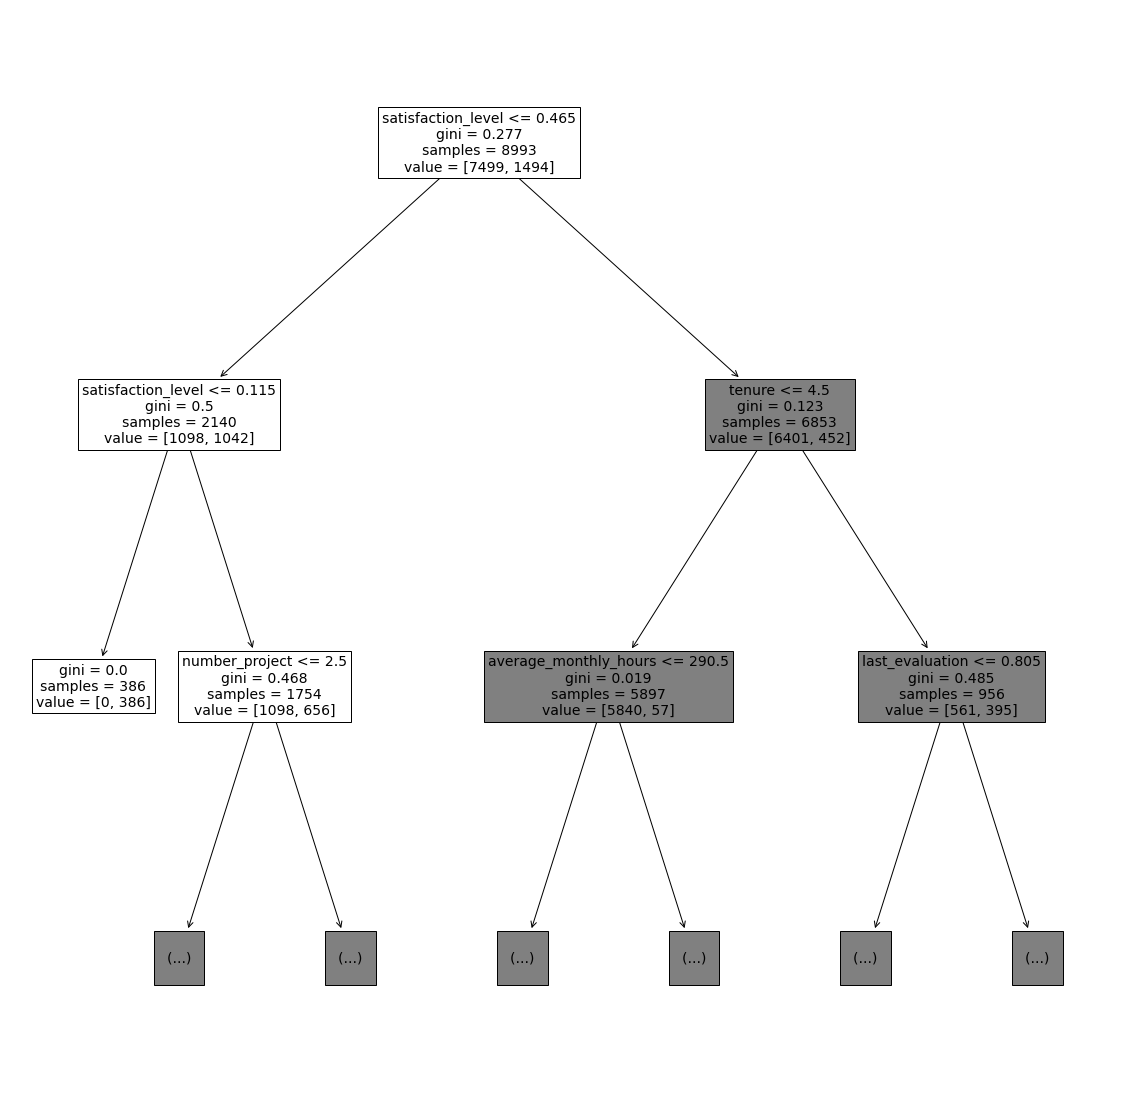

In [62]:
plt.figure(figsize=(20,20))
plot_tree(tree1.best_estimator_, max_depth=2,fontsize=14, feature_names=X.columns );

In [63]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {"max_depth": [4, 6, 8, None ],
             "max_features" : [1.0],
             "max_samples": [0.7, 1.0],
             "min_samples_leaf": [1, 2, 3],
             "min_samples_split": [2, 3, 4],
             "n_estimators": [500]}

# Assign a dictionary of scoring metrics to capture 
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

# Instantiate Gridsearch
rf1 = GridSearchCV(rf,
                   cv_params,
                   scoring=scoring,
                   cv=4,
                   refit="roc_auc")

In [68]:
%%time

rf1.fit(X_train, y_train)

CPU times: user 8min 49s, sys: 0 ns, total: 8min 49s
Wall time: 8min 49s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [84]:
path = "./models/"

In [81]:
!pwd

/home/jovyan/work


In [83]:
!ls

'Activity_ Course 7 Salifort Motors project lab.ipynb'
 cleaned_hr_dataset.csv
 HR_capstone_dataset.csv
 models


In [82]:
!mkdir models

In [85]:
def write_pickle(path: str, model_object, save_as:str):
    """Save the trained model using pickle
    
    Parameter
    ---------
    path: str
        Path of folder to save the pickle
    model_object: Model
        A model to be pickled
    save_as: str
        Filename for hwo to save the model
    
    Return:
        A call to pickle the model in the folder indicated
    """
    with open(path + save_as + ".pickle", "wb") as to_write:
        pickle.dump(model_object, to_write)

In [86]:
def read_pickle(path:str, saved_model_name: str):
    """Read the saved pickled model
    
    Paramaters
    ----------
    path: str
        Path of folder to read saved model from
    saved_model_name: str
        Filename of pickled model to read in
        
    Return
    ------
    model: The pickled model
    """
    with open(path + saved_model_name + ".pickle", "rb") as to_read:
        model = pickle.load(to_read)
    return model

In [87]:
write_pickle(path, rf1, "hr_rf1")

In [88]:
rf1 = read_pickle(path, "hr_rf1")

In [89]:
rf1.best_score_

0.9790751171477935

In [90]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [91]:
rf1_cv_results = make_results("random forest cv", rf1, "auc")
print(tree1_cv_results)
print(rf1_cv_results)

              Model        F1    recall  precision  accuracy      auc
0  Decision tree cv  0.947412  0.922352   0.973961  0.982987  0.96496
              Model        F1    recall  precision  accuracy       auc
0  random forest cv  0.954622  0.922351   0.989285  0.985433  0.976425


In [92]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    """Generate a table of test scores
    
    Parameters
    ----------
    model_name:str
        A choosen name to represent the model on the table
    model: 
        A fit GridSearchCV object
    X_test_data:array
        Numpy array of X_test data
    y_test_data: array
        Numpy array of y_test data
        
    Return
    ------
    table: pd.DataFrame
        Dataframe of precision, recall, f1, accuracy, and AUC scores for the model"""
    
    preds = model.best_estimator_.predict(X_test_data)
    
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)    
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({"model": [model_name],
                         "accuracy": [accuracy],
                         "precision": [precision],
                         "recall": [recall],
                         "f1": [f1],
                         "AUC": [auc]})
    return table

In [93]:
rf1_test_scores = get_scores("randoom forest1 test", rf1, X_test, y_test)
rf1_test_scores

,model,accuracy,precision,recall,f1,AUC
0,randoom forest1 test,0.982322,0.984716,0.907445,0.944503,0.952323


In [94]:
df2 = df_encoded.drop('satisfaction_level', axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [95]:
df2["overworked"] = df2["average_monthly_hours"]

print(f"Max hours : {df2['overworked'].max()}")
print(f"Min hours : {df2['overworked'].min()}")

Max hours : 310
Min hours : 96


In [96]:
df2["overworked"] = (df2["overworked"] > 170).astype(int)

df2["overworked"].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [97]:
df2 = df2.drop("average_monthly_hours", axis=1)

# Display first few rows for resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [98]:
y = df2["left"]

# select the features
X = df2.drop("left", axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [99]:
decision_tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hypyparameters to search over 
cv_params = {"max_depth": [6, 8, 10, None],
            "min_samples_leaf": [2, 3, 5,1],
            "min_samples_split": [2, 4, 6, 8]
            }

# Assign a dictionary of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

# Instantiate GridSearch
tree2 = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit="roc_auc")

In [100]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 4.37 s, sys: 0 ns, total: 4.37 s
Wall time: 4.37 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6, 8, 10, None],
                         'min_samples_leaf': [2, 3, 5, 1],
            

In [101]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [102]:
tree2.best_score_

0.9583665988062298

In [103]:
tree2_cv_results = make_results("decision tree2 cv", tree2, "auc")
print(tree1_cv_results)
print(tree2_cv_results)

              Model        F1    recall  precision  accuracy      auc
0  Decision tree cv  0.947412  0.922352   0.973961  0.982987  0.96496
               Model        F1    recall  precision  accuracy       auc
0  decision tree2 cv  0.891509  0.889482    0.89369  0.964083  0.953286


In [104]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary to hyperparameters to search over
cv_params = {"max_depth": [2,3,5,8, None],
            "max_features": [1.0],
            "max_samples" : [0.7, 1.0],
            "min_samples_leaf": [1,2,3],
            "min_samples_split": [2,3,4],
            "n_estimators": [500]
            }

# Assign a dictionary of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, verbose=1, cv=4, refit="roc_auc")

In [105]:
%%time
rf2.fit(X_train, y_train)

Fitting 4 folds for each of 90 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.9min finished


CPU times: user 6min 55s, sys: 0 ns, total: 6min 55s
Wall time: 6min 55s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [106]:
write_pickle(path, rf2, "hr_rf2")

In [107]:
rf2 = read_pickle(path, "hr_rf2")

In [108]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [109]:
rf2.best_score_

0.9646932163457633

In [110]:
rf2_cv_results = make_results("random forest2 cv", rf2, "auc")
print(tree2_cv_results)
print(rf2_cv_results)

               Model        F1    recall  precision  accuracy       auc
0  decision tree2 cv  0.891509  0.889482    0.89369  0.964083  0.953286
               Model        F1    recall  precision  accuracy       auc
0  random forest2 cv  0.898913  0.899532   0.898341  0.966419  0.961374


In [111]:
rf2_test_scores = get_scores("random forest2 test", rf2, X_test, y_test)
rf2_test_scores

,model,accuracy,precision,recall,f1,AUC
0,random forest2 test,0.959973,0.866279,0.89759,0.881657,0.934995


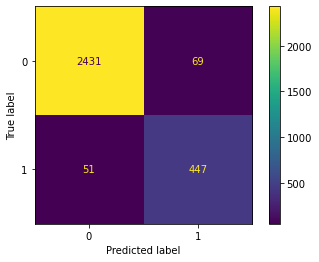

In [112]:
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
disp.plot(values_format="");

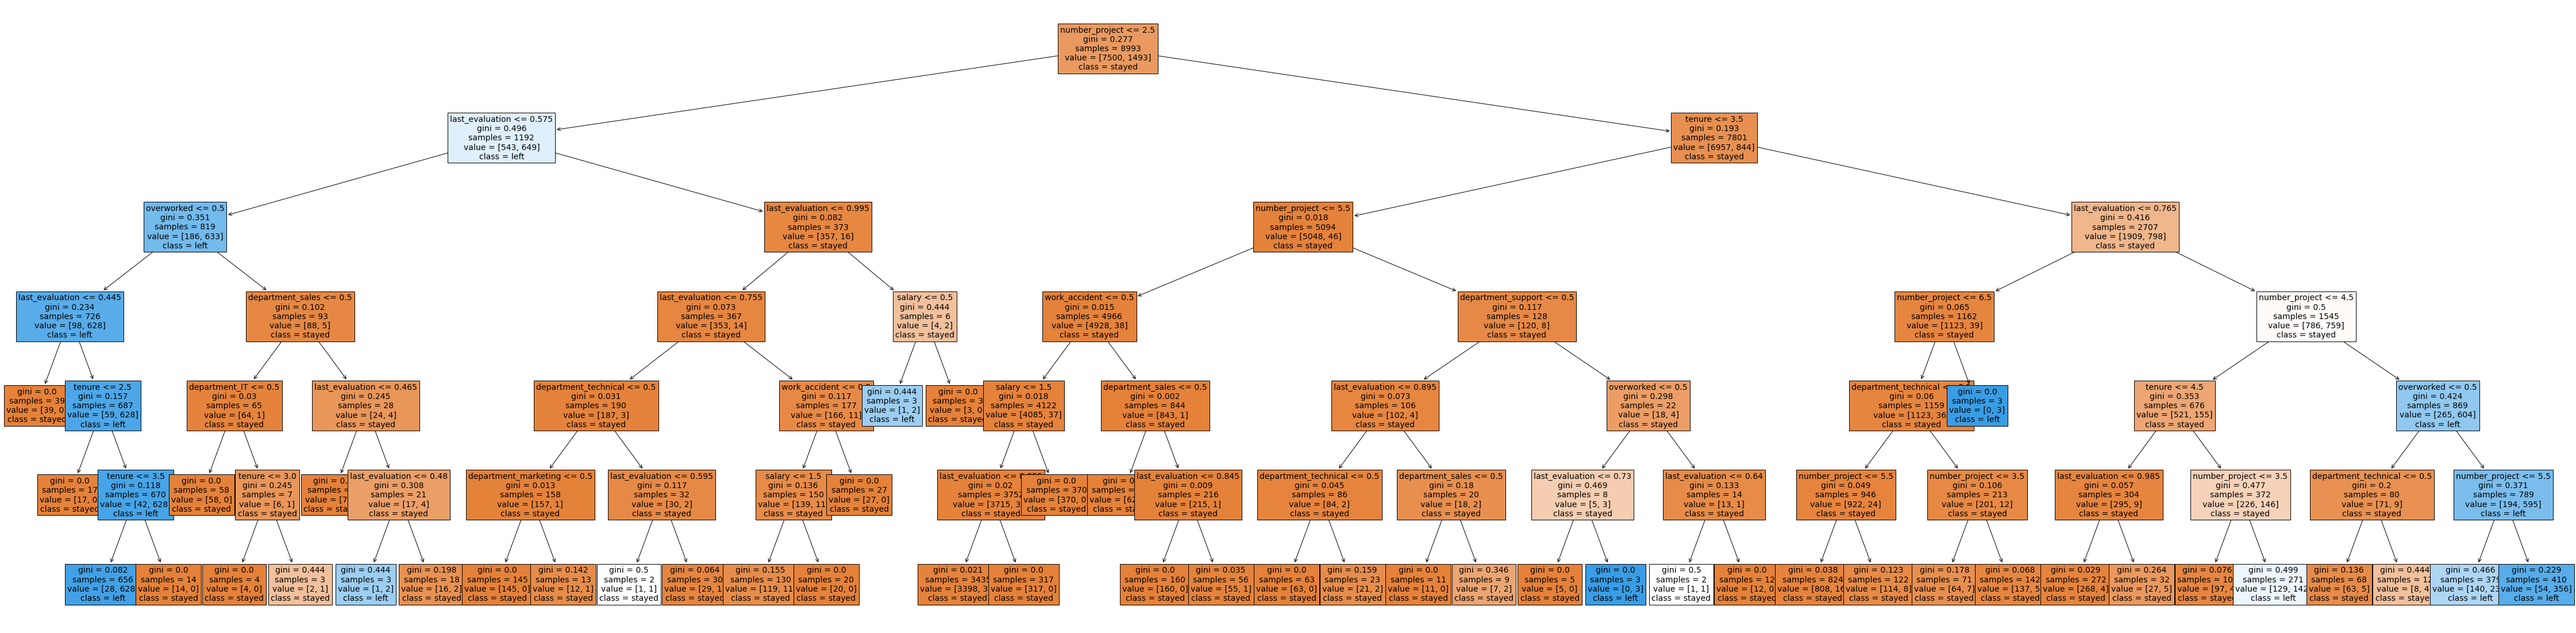

In [113]:
plt.figure(figsize=(80,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
         class_names={0:"stayed", 1:"left"}, filled=True);
plt.show()

In [114]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.344443
number_project,0.344235
tenure,0.214199
overworked,0.093587
department_technical,0.001179
salary,0.000911
department_sales,0.000626
department_support,0.000418
work_accident,0.000183
department_IT,0.000141


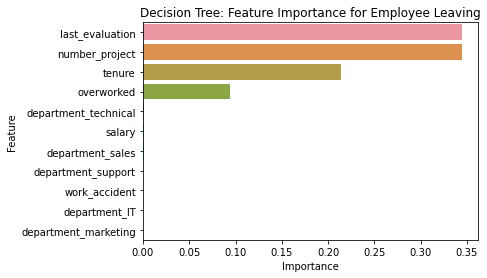

In [115]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient="h")
plt.title("Decision Tree: Feature Importance for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

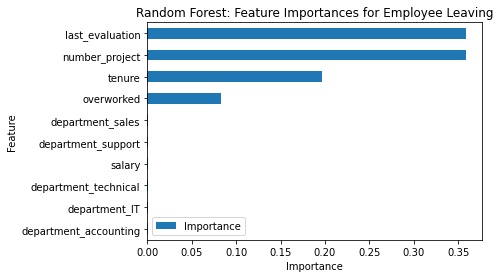

In [116]:
feature_importance = rf2.best_estimator_.feature_importances_

# Get indices of top 10 figures
idx_top_ten = np.argpartition(feature_importance, -10)[-10:]

# Get the column labels of the top 10 features
feat = X.columns[idx_top_ten]


# Filter `feature_importance` to consist of top 10 feature importance
feature_importance = feature_importance[idx_top_ten]

y_df = pd.DataFrame({"Feature":feat,"Importance":feature_importance})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.